# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang digunakan pada submission kali ini adalah dataset kompetisi IEEE-CIS Fraud Detection.
   Dataset ini merupakan data transaksi kartu kredit dengan label `isFraud` sebagai target. Tujuan akhirnya adalah membangun sistem machine learning yang dapat memprediksi apakah sebuah transaksi bersifat fraud atau tidak.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import subprocess
import shutil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Set visual style
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
!pip install kaggle --quiet

In [4]:
# Buat folder .kaggle
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy kaggle.json ke direktori .kaggle
shutil.copy("kaggle.json", kaggle_dir + "/kaggle.json")

# Atur permission (khusus Linux/Mac, bisa dilewati di Windows)
os.chmod(kaggle_dir + "/kaggle.json", 0o600)

print("✅ Kaggle API key berhasil diset.")

✅ Kaggle API key berhasil diset.


In [5]:
# Buat folder penyimpanan
dataset_dir = "../dataset_raw"
os.makedirs(dataset_dir, exist_ok=True)

# Download dari Kaggle
!kaggle datasets download -d /uciml/adult-census-income -p {dataset_dir}

# Ekstrak semua ZIP di dalam folder
for file in os.listdir(dataset_dir):
    if file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(dataset_dir, file), 'r') as zip_ref:
            zip_ref.extractall(dataset_dir)
        print(f"✅ Extracted: {file}")

Invalid dataset specification /uciml/adult-census-income
✅ Extracted: adult.csv.zip


D:\Anaconda\envs\tf_gpu\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [6]:
df = pd.read_csv(os.path.join(dataset_dir, "adult.csv"))
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
# Ukuran dan info data
print("Ukuran data:", df.shape)
df.info()

Ukuran data: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


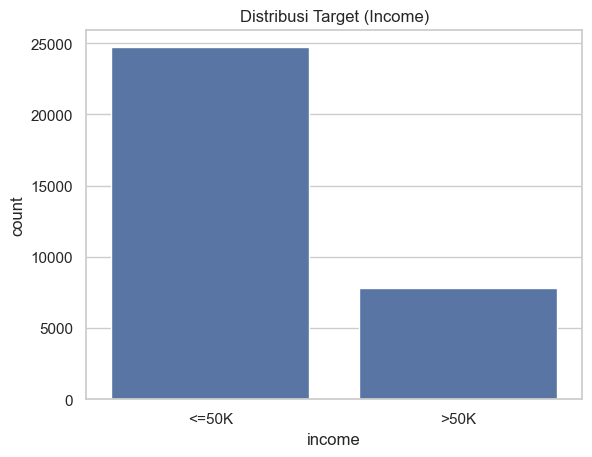

In [8]:
# Contoh distribusi target
sns.countplot(x="income", data=df)
plt.title("Distribusi Target (Income)")
plt.show()

In [9]:
# Lihat rasio income
print(df["income"].value_counts())
print(df["income"].value_counts(normalize=True))

income
<=50K    24720
>50K      7841
Name: count, dtype: int64
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64


In [10]:
# Statistik deskriptif numerik
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


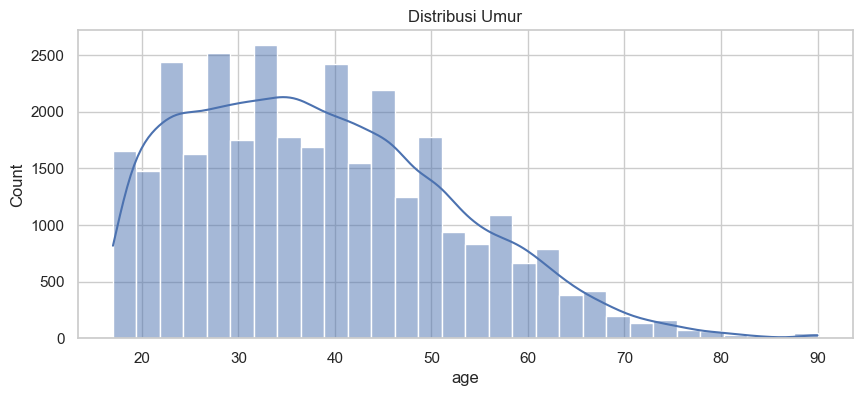

In [11]:
# Visualisasi distribusi usia
plt.figure(figsize=(10,4))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Distribusi Umur")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Hapus duplikat
print("Jumlah data duplikat:", df.duplicated().sum())
df = df.drop_duplicates()

# Ganti tanda tanya dengan NaN (kolom kategorikal kadang pakai " ?" sebagai missing)
df.replace("?", np.nan, inplace=True)

# Cek dan tampilkan info
print("Data setelah menghapus duplikat:", df.shape)

Jumlah data duplikat: 24
Data setelah menghapus duplikat: (32537, 15)


In [13]:
# Cek missing
print("Missing values sebelum drop:")
print(df.isna().sum())

# Drop semua baris yang mengandung NaN
df.dropna(inplace=True)

#Cek data setelah drop NaN
print("Data setelah menghapus duplikat:", df.shape)

Missing values sebelum drop:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64
Data setelah menghapus duplikat: (30139, 15)


In [14]:
# Pastikan income tidak ada NaN
print("Jumlah missing di income:", df["income"].isna().sum())

Jumlah missing di income: 0


In [15]:
# Encode target income: string → binary
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

# Pisahkan fitur dan target
X = df.drop("income", axis=1)
y = df["income"]

In [16]:
# Konversi kategori ke dummy
X_encoded = pd.get_dummies(X)

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (24111, 104)
Ukuran X_test: (6028, 104)
Ukuran y_train: (24111,)
Ukuran y_test: (6028,)


In [18]:
# Save preprocessed data
X_train.to_csv("dataset_preprocessed/X_train.csv", index=False)
X_test.to_csv("dataset_preprocessed/X_test.csv", index=False)
y_train.to_csv("dataset_preprocessed/y_train.csv", index=False)
y_test.to_csv("dataset_preprocessed/y_test.csv", index=False)

In [20]:
# Copy dataset ke folder Membangun_model
source_dir = r"C:\Users\GL65 RTX2070\Jupyter\SMSML_Muhammad-Rizki-Yudistira\Eksperimen_SML_Muhammad_Rizki_Yudistira\preprocessing\dataset_preprocessed"
dest_dir = r"C:\Users\GL65 RTX2070\Jupyter\SMSML_Muhammad-Rizki-Yudistira\Membangun_model\dataset_preprocessing"

# Pastikan folder tujuan ada
os.makedirs(dest_dir, exist_ok=True)

# Daftar file yang ingin disalin
file_list = ["X_train.csv", "X_test.csv", "y_train.csv", "y_test.csv"]

# Salin file satu per satu
for file_name in file_list:
    src_file = os.path.join(source_dir, file_name)
    dst_file = os.path.join(dest_dir, file_name)

    if os.path.exists(src_file):
        shutil.copy(src_file, dst_file)
        print(f"✅ Berhasil disalin: {file_name}")
    else:
        print(f"❌ File tidak ditemukan: {file_name}")



✅ Berhasil disalin: X_train.csv
✅ Berhasil disalin: X_test.csv
✅ Berhasil disalin: y_train.csv
✅ Berhasil disalin: y_test.csv
